In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import regex as re

In [21]:
# Step 1: Read the data from 'train_emoticon.csv'
# Assuming the CSV file has no header and columns are 'emoji_sequence' and 'label'
df = pd.read_csv('/home/belief/Desktop/MLProj1/mini-project-1/datasets/train/train_emoticon.csv')
# Step 2: Split each emoji sequence into individual emojis
# Use regex to handle emojis correctly
def split_emojis(emoji_sequence):
    # Use the regex pattern \X to match grapheme clusters (i.e., emojis)
    return re.findall(r'\X', emoji_sequence)
# Apply the function to create a new column with the list of emojis
df['emoji_list'] = df['input_emoticon'].apply(split_emojis)
# Verify that all sequences have 13 emojis
sequence_lengths = df['emoji_list'].apply(len)
if not all(sequence_lengths == 13):
    # Find rows with incorrect sequence lengths
    incorrect_lengths = df[sequence_lengths != 13]
    print("Warning: The following rows do not have 13 emojis:")
    print(incorrect_lengths)
    # Optionally, handle these rows (e.g., drop them or pad/truncate the sequences)
    # For now, we'll proceed but you may need to address this
# Step 3: Collect all unique emojis and assign a unique numerical ID to each
# Flatten the list of emoji lists to get all emojis
all_emojis = [emoji for emoji_list in df['emoji_list'] for emoji in emoji_list]
unique_emojis = sorted(set(all_emojis))
emoji_to_id = {emoji: idx for idx, emoji in enumerate(unique_emojis)}
# Save the mapping to a file (optional)
with open('emoji_mapping.txt', 'w', encoding='utf-8') as f:
    for emoji, idx in emoji_to_id.items():
        f.write(f'{emoji}: {idx}\n')
# Step 4: Replace the emojis in the data with the assigned numbers
# Convert each emoji in the list to its corresponding ID
def emojis_to_ids(emoji_list):
    return [emoji_to_id[emoji] for emoji in emoji_list]

df['emoji_ids'] = df['emoji_list'].apply(emojis_to_ids)
# Expand the emoji IDs into separate columns
emoji_columns = [f'emoji_{i+1}' for i in range(13)]
emoji_ids_df = pd.DataFrame(df['emoji_ids'].tolist(), columns=emoji_columns)
# Combine the emoji ID columns with the label
df = pd.concat([emoji_ids_df, df['label']], axis=1)

In [22]:
print(df)

      emoji_1  emoji_2  emoji_3  emoji_4  emoji_5  emoji_6  emoji_7  emoji_8  \
0          26      198       58       16       34       93      106      179   
1         198       16       41       26      179      106       34      126   
2          26      106       16      154       34      179      198      109   
3          26      179      198       78       34      106       16      102   
4         198      152      179       26       73       16       34      106   
...       ...      ...      ...      ...      ...      ...      ...      ...   
7075      106       57       58       16       34      198       26      179   
7076      198      179        5      106       34      115       26       16   
7077      209       16       80       26       34      106      198      179   
7078       34       16       26      193      198      106      179      163   
7079       26       34      179       16      198       56      106      165   

      emoji_9  emoji_10  emoji_11  emoj

In [23]:
# Separate features and labels
X = df.drop('label', axis=1)  # Features: all columns except 'label'
y = df['label']               # Target variable: 'label' column

In [24]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
# print(X_train, X_test, y_train, y_test)

In [25]:
# # Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train
X_test_scaled = X_test

In [26]:
# Build the model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


/home/belief/Desktop/MLProj1/MLProj1env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=55,
    batch_size=32,
    verbose=1
)

Epoch 1/55
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.5022 - loss: 3.2041 - val_accuracy: 0.5216 - val_loss: 1.0341
Epoch 2/55
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.5263 - loss: 1.0240 - val_accuracy: 0.5410 - val_loss: 0.8294
Epoch 3/55
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.5479 - loss: 0.8122 - val_accuracy: 0.5004 - val_loss: 0.9690
Epoch 4/55
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.5632 - loss: 0.7498 - val_accuracy: 0.4934 - val_loss: 0.8453
Epoch 5/55
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.5683 - loss: 0.7242 - val_accuracy: 0.5278 - val_loss: 0.7908
Epoch 6/55
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.5629 - loss: 0.7529 - val_accuracy: 0.5384 - val_loss: 0.8723
Epoch 7/55
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.5631 - loss: 0.7460 - val_accuracy: 0.5216 - val_loss: 0.7548
Epoch 8/55
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.5786 - loss: 0.6898 - 

In [29]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.5254


In [30]:
# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step


In [31]:
# Evaluate predictions
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[492 208]
 [464 252]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.70      0.59       700
           1       0.55      0.35      0.43       716

    accuracy                           0.53      1416
   macro avg       0.53      0.53      0.51      1416
weighted avg       0.53      0.53      0.51      1416



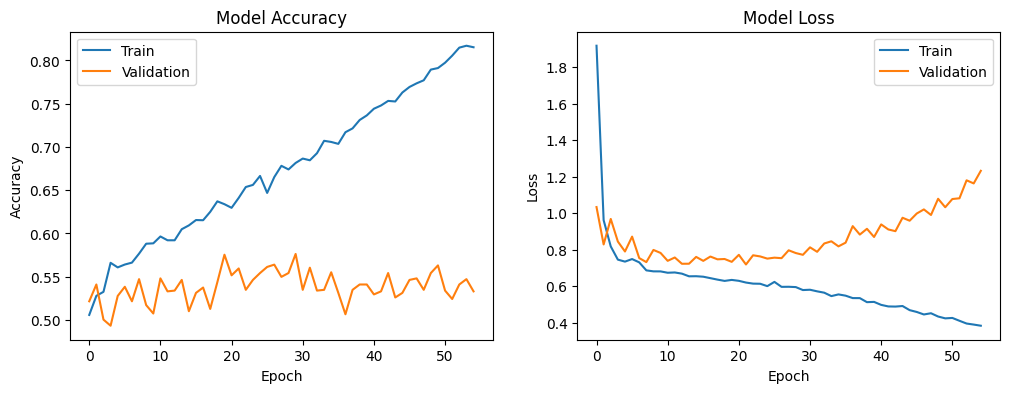

In [32]:
# Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
